In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (57).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (6).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (5).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (24).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (42).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (9).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (37).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (30).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (59).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (50).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (20).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (14).jpg
/kaggle

In [2]:
import os
dircs=os.listdir('/kaggle/input/Fishdiseasedataset/combine/FishDisease')

In [3]:
X_directory=[]
y_directory=[]
for directory in dircs:
    image_paths=os.listdir(f'/kaggle/input/Fishdiseasedataset/combine/FishDisease/{directory}')
    for img_name in image_paths:
        X_directory.append(f'/kaggle/input/Fishdiseasedataset/combine/FishDisease/{directory}/{img_name}')
        y_directory.append(directory)

In [4]:
df={"fishimages":X_directory,"fishlabels":y_directory}

In [5]:
df = pd.DataFrame(df)
df.style

,fishimages,fishlabels
0,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-166.png,white spot
1,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-246.png,white spot
2,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-263.png,white spot
3,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-264.png,white spot
4,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-92.png,white spot
5,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-123.png,white spot
6,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-93.png,white spot
7,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-29.png,white spot
8,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-223.png,white spot
9,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-45.png,white spot


In [6]:
import pandas as pd
import numpy as np
df=pd.DataFrame(df)

In [7]:
from sklearn.preprocessing import OneHotEncoder
df = df.sample(frac=1).reset_index(drop=True)
onehot=OneHotEncoder()
lab=onehot.fit_transform(df['fishlabels'].values.reshape(-1,1)).toarray()
images=df['fishimages']
print('total labels of images',len(lab))
print('total images',len(images))

total labels of images 1382
total images 1382


In [8]:
import cv2
import matplotlib.pyplot as plt
imgs=[]
for img in images:
    if img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)

        # define range of white color in HSV
        # change it according to your need !
        lower_white = np.array([0,0,168], dtype=np.uint8)
        upper_white = np.array([172,111,255],dtype=np.uint8)

        # Threshold the HSV image to get only white colors
        mask = cv2.inRange(hsv, lower_white, upper_white)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)
        imgs.append(res)
         
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/red spot/"):
        imag = cv2.imread(img)

        frame = cv2.resize(imag,(224,224)) 

        kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
        image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)

        lower_red = np.array([0,50,50])
        upper_red = np.array([10,255,255])


        #upper red
        lower_red2 = np.array([170,50,50])
        upper_red2 = np.array([180,255,255])

        mask = cv2.inRange(hsv, lower_red, upper_red)
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

        red=res+res2
        imgs.append(red)
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/black spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        imagehsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)


        lower_black = np.array([0,0,0])
        upper_black = np.array([179,255,127])

        imagemask = cv2.inRange(imagehsv, lower_black, upper_black)
        result = cv2.bitwise_not(image_sharp,image_sharp, mask=imagemask)

        imgs.append(result)
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/fresh fish/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)

        imgs.append(image_sharp)

In [9]:
X_preprocess=np.array(imgs)
y_preprocess=np.array(lab)

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_preprocess, y_preprocess, random_state = 42,shuffle=True, 
                                                   test_size=0.20)

In [11]:
X_train_norm=train_x/255.0
X_test_norm=test_x/255.0

In [12]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import itertools

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, Adadelta
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.np_utils import to_categorical

In [13]:
from tensorflow.keras.applications import vgg16
 
# Init the VGG model 
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3),pooling="avg")







2022-12-17 13:58:38.753369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 13:58:38.940042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 13:58:38.940895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-17 13:58:38.942209: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [32]:
for layer in vgg_conv.layers[4:15]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
vgg_conv.summary()

<keras.engine.input_layer.InputLayer object at 0x7f8a9b689e50> True
<keras.layers.convolutional.Conv2D object at 0x7f89ddae5910> True
<keras.layers.convolutional.Conv2D object at 0x7f89ddae5090> True
<keras.layers.pooling.MaxPooling2D object at 0x7f89dd71b2d0> True
<keras.layers.convolutional.Conv2D object at 0x7f89ddafd110> False
<keras.layers.convolutional.Conv2D object at 0x7f89dd08cd10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f89dd094f50> False
<keras.layers.convolutional.Conv2D object at 0x7f89dd099b10> False
<keras.layers.convolutional.Conv2D object at 0x7f89dd094810> False
<keras.layers.convolutional.Conv2D object at 0x7f89dd0a2790> False
<keras.layers.pooling.MaxPooling2D object at 0x7f89dd0ab750> False
<keras.layers.convolutional.Conv2D object at 0x7f89dd0a4190> False
<keras.layers.convolutional.Conv2D object at 0x7f89dd5553d0> False
<keras.layers.convolutional.Conv2D object at 0x7f89dd55d790> False
<keras.layers.pooling.MaxPooling2D object at 0x7f89dd55f050> Fal

In [35]:
model_feat = Model(inputs=vgg_conv.input,outputs=vgg_conv.get_layer('global_average_pooling2d').output)
feat_train = model_feat.predict(X_train_norm)
print(feat_train.shape)


feat_test = model_feat.predict(X_test_norm)
print(feat_test.shape)

2022-12-17 14:11:18.378805: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 665333760 exceeds 10% of free system memory.
2022-12-17 14:11:19.141409: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 665333760 exceeds 10% of free system memory.


(1105, 512)
(277, 512)


In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(feat_train,np.argmax(train_y,axis=1))

clf.score(feat_test,np.argmax(test_y,axis=1))

0.9747292418772563

In [38]:
clf_pred=clf.predict(feat_test)

Confusion Matrix
[[71  2  0  0]
 [ 3 68  0  1]
 [ 0  0 62  0]
 [ 0  0  1 69]]
['Black Spot', 'Fresh Fish', 'Red Spot', 'White Spot']


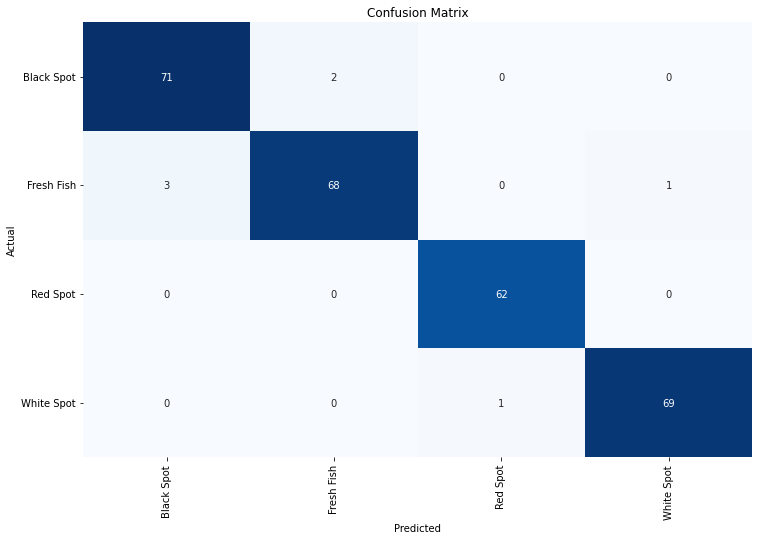

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import seaborn as sns
y_test_arg=np.argmax(test_y,axis=1)
Y_pred = clf_pred
print('Confusion Matrix')
cm=confusion_matrix(y_test_arg, Y_pred)
print(cm)
class_name={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
classes=list(class_name.values())
print(classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(4)+.5,classes, rotation=90)
plt.yticks(np.arange(4)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [44]:
print('classification report')
print(classification_report(y_test_arg,Y_pred,target_names=classes, digits= 4))

classification report
              precision    recall  f1-score   support

  Black Spot     0.9595    0.9726    0.9660        73
  Fresh Fish     0.9714    0.9444    0.9577        72
    Red Spot     0.9841    1.0000    0.9920        62
  White Spot     0.9857    0.9857    0.9857        70

    accuracy                         0.9747       277
   macro avg     0.9752    0.9757    0.9754       277
weighted avg     0.9747    0.9747    0.9747       277

